In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tesis_data_raw.csv')
df2 = pd.read_csv('tesis_data_raw_second.csv')
del df['Unnamed: 0']
del df2['Unnamed: 0']

C:\Users\Max\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Max\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = pd.concat([df, df2], axis=0)
len(df)

15982806

## Preprocesamiento de datos

In [4]:
df = df[df['created_at'].notna()]
df = df[df['text'].notna()]
print(df.created_at.min(), df.created_at.max())

2018-10-10 20:19:24+00:00 2022-07-14 00:00:00+00:00


In [5]:
df['time'] = pd.to_datetime(df['created_at'])

In [6]:
df = df.drop_duplicates(subset=['id'])
df = df[df['time'].notna()]

In [7]:
len(df)

14403362

In [35]:
df = df[(df.time > '2021-09-02') & (df.time < '2021-09-20')]
len(df)

898929

In [36]:
df.head()

,created_at,id,user_id,screen_name,followers_count,friend_count,in_reply_to_user_id,in_reply_to_screen_name,text,time,text_clean_sent,text_clean_lang
6,2021-09-18 16:53:45+00:00,1.439271e+18,1.402801e+18,FernandoSaaved2,311.0,182.0,NaN,NaN,RT @HarryJurgensen: Las 1.128 ENMIENDAS presen...,2021-09-18 16:53:45+00:00,Las 1.128 ENMIENDAS presentadas a los REGLAMEN...,las 1.128 enmiendas presentadas a los reglamen...
28,2021-09-03 00:32:25+00:00,1.433589e+18,7.305335e+17,therno666,340.0,465.0,NaN,NaN,RT @carlos81956718: Franco Parisi expone el Ve...,2021-09-03 00:32:25+00:00,Franco Parisi expone el Verdadero motivo de po...,franco parisi expone el verdadero motivo de po...
35,2021-09-05 22:34:08+00:00,1.434646e+18,1.156790e+18,Corisal3,817.0,564.0,NaN,NaN,RT @carlos81956718: El Pelao Vade es de la mis...,2021-09-05 22:34:08+00:00,El Pelao Vade es de la misma CEPA que Ancalao ...,el pelao vade es de la misma cepa que ancalao ...
74,2021-09-14 00:37:39+00:00,1.437576e+18,6.313310e+08,yoly2944,411.0,298.0,NaN,NaN,RT @TERE_LAprofe73: EN DOS MESES BAJA 20 PUNTO...,2021-09-14 00:37:39+00:00,"_LAprofe73 EN DOS MESES BAJA 20 PUNTOS LA CC ,...","_laprofe73 en dos meses baja 20 puntos la cc ,..."
78,2021-09-03 21:08:29+00:00,1.433900e+18,1.259296e+18,Cristob40910084,3.0,47.0,NaN,NaN,RT @fernando_atria: ¿Qué le puedo comentar? So...,2021-09-03 21:08:29+00:00,_atria ¿Que le puedo comentar? Solo que lea el...,_atria ¿que le puedo comentar? solo que lea el...


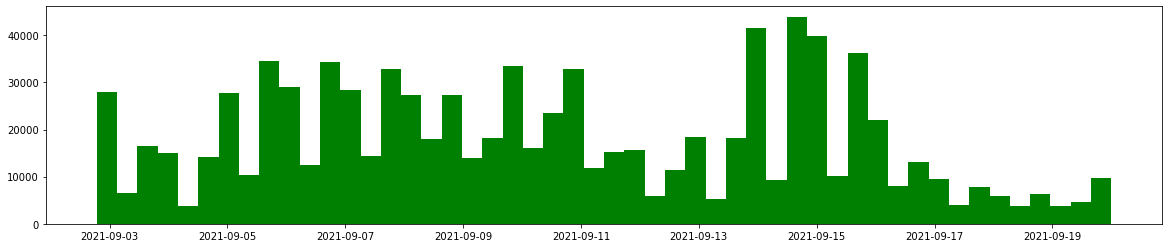

Wall time: 10.1 s


In [37]:
%%time
plt.figure(figsize=(20, 4))
plt.hist(df['time'], bins = 50, color='green')
plt.show()

### Limpieza

In [31]:
!pip install spacy_langdetect

In [12]:
!python -m spacy download es_core_news_md

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [38]:
# Función para limpiar texto
from unicodedata import normalize
import regex as re
def clean_text_sent(s):
    s = re.sub('http\S+', ' ', s + ' ') # Eliminar urls
    s = re.sub('RT', '', s)
    s = re.sub(': ', ' ', s)
    s = re.sub('@[A-Za-z0-9]+', ' ', s + ' ') # Eliminar @cuentas
    s = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize('NFD', s), 0, re.I)
    s = re.sub('…', '', s)
    s = re.sub('\n', ' ', s)
    s = re.sub(' +',' ', s).strip()
    return s

def clean_text_lang(s):
    s = s.lower()
    s = re.sub('http\S+', ' ', s + ' ') # Eliminar urls
    s = re.sub('rt', '', s)
    s = re.sub(': ', ' ', s)
    s = re.sub('@[A-Za-z0-9]+', ' ', s + ' ') # Eliminar @cuentas
    s = re.sub('#[a-zA-Z0-9_]', ' ', s + ' ') # Eliminar #Hashtags
    s = re.sub('<[^\s]*>', ' ', s + ' ') # Eliminar emoticones <U+0001F3AA>
    s = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize('NFD', s), 0, re.I)
    s = re.sub('…', '', s)
    s = re.sub('\n', ' ', s)
    s = re.sub(' +',' ', s).strip()
  
    return s

In [39]:
%%time
# Limpiar textos y nueva columna
df['text_clean_sent'] = df.text.apply(clean_text_sent)
df['text_clean_lang'] = df.text.apply(clean_text_lang)

Wall time: 1min 43s


In [15]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("es_core_news_md")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)


In [16]:
text = '_LAprofe73 LES COMPAO ESTAS LINDAS IMAGENES DEL MERCADO DE LA CIUDAD DE IQUIQUE , CONVEIDA EN LA CAPITAL DE NUEVA ZELANDA . GR'
doc = nlp(text)
print(doc._.language)

{'language': 'en', 'score': 0.9999957110923606}


In [68]:
%%time
keywords=['chile', 'convencion', 'constitucion', 'marinovic', ' afp ', 'retiros', 'feminista', 'la cc', 'boric',
         'constituyente', 'constituyentes', 'loncon']
ls_indices = []
ls_out = []
c = 0
out = 0
for idx, row in df.iterrows():
    c+=1
    if (c%10000 == 0):
        print(c)
    txt = row.text_clean_lang
    doc = nlp(txt)
    lang = doc._.language['language']
    score = doc._.language['score']
    if (lang == 'es') or (lang == 'pt') or any(word in txt for word in keywords):
        ls_indices.append(idx)
    else:
        out+=1
        ls_out.append(idx)
        
print(out)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
75963
Wall time: 5h 51min 21s


In [69]:
df_lang = df.loc[ls_indices]

In [71]:
df_lang.to_csv('df_lang.csv',index=False)

In [ ]:
df_lang.to_csv('tweets_inflexion_language.csv', index=False)

In [ ]:
df.iloc[0].text

### Otras cosas

In [ ]:
%%time
dic_screen = {}
for _, row in dataset.iterrows():
    user_id = row.user_id
    screen = row.screen_name
    if user_id not in dic_screen:
        dic_screen[screen] = user_id

In [ ]:
%%time
# Esto crea un dataframe basado en los retweet de la forma usuario1 retweetea a usuario2
df_rt = df_date_filter[df_date_filter['text'].str.contains("RT @")]
rt_dict = {}
ls_pares = []
for _, row in df_rt.iterrows():
    txt = row['text'].split(':')[0]
    rt_user = txt.split('@')[-1]
    try:
        pair = sorted([row.screen_name, rt_user])
        if pair[0] != pair[1]:
            pair[0] = str(pair[0])
            pair[1] = str(pair[1])
            key = ' '.join(pair)
            ls_pares.append(pair[0] + " " + pair[1])
            if key not in rt_dict:
                rt_dict[key] = 0
            rt_dict[key] += 1
    except:
        pass
df_pares = pd.DataFrame(ls_pares, columns=['users'])

users_cant = df_pares.groupby('users').size().reset_index(name='counts')
df_cant_pares = users_cant[users_cant['counts'] > 0]
ls_users = []

df_usuarios = df_cant_pares['users'].str.split(' ', expand=True).rename({0: 'user1', 1: 'user2'}, axis=1)
df_usuarios.head()

In [ ]:
df_usuarios = df_usuarios[['user1', 'user2']]

In [ ]:
u1 = df_usuarios.user1.to_list()
u2 = df_usuarios.user2.to_list()
u = list(set(u1 + u2))
len(u)

In [ ]:
df_user_filter = df_date_filter[df_date_filter.screen_name.isin(u)]

In [ ]:
df_user_filter.to_csv('tweets_tesis.csv', index=False)

## Rest

In [ ]:
df = df_user_filter

In [ ]:
def hashtags(dataset):
    hash_dic = {}
    for _, row in dataset.iterrows():
        text = row.text
        words = text.split(' ')
        ls_hashtags = []
        for w in words:
            try:
                if w[0] == '#':
                    ls_hashtags.append(w)
            except:
                pass
        for h in ls_hashtags:
            if h not in hash_dic:
                hash_dic[h] = 0
            hash_dic[h] += 1
    return hash_dic

def order_dic(dic_hashtags):
    for k in sorted(dic_hashtags, key=dic_hashtags.get, reverse=True):
        print(k, dic_hashtags[k])

### Maria Elisa Quinteros Presidencia (5 de Enero 2022)

In [ ]:
meq = df[(df.created_at > '2022-01-05') & (df.created_at < '2022-01-12')]

In [ ]:
meq = meq[meq.text.str.contains("Maria Elisa Quinteros|María Elisa Quinteros|MEQ")]

In [ ]:
len(meq)

In [ ]:
meq.to_csv('Noticias/MEQ_tweets.csv', index=False)

### Borrador (Junio 2022)

In [ ]:
borrado = df[(df.created_at > '2022-06-27') & (df.created_at < '2022-07-10')]

In [ ]:
borrado = borrado[borrado.text.str.contains("borrador|Borrador")]

In [ ]:
len(borrado)

In [ ]:
borrado.to_csv('Noticias/Borrador_tweets.csv', index=False)

### Fin del Senado (Mayo 2022)

In [ ]:
senado = df[(df.created_at > '2022-04-12') & (df.created_at < '2022-04-20')]

In [ ]:
senado = senado[senado.text.str.contains("Senado|senado")]

In [ ]:
len(senado)

In [ ]:
senado.to_csv('Noticias/Senado_tweets.csv', index=False)

### Embarazo (Marzo 2022)

In [ ]:
embarazo = df[(df.created_at > '2022-03-14') & (df.created_at < '2022-03-23')]

In [ ]:
embarazo = embarazo[embarazo.text.str.contains("Aborto|aborto|interrupción voluntaria|interrupcion voluntaria|embarazo")]

In [ ]:
len(embarazo)

In [ ]:
embarazo.to_csv('Noticias/Embarazo_tweets.csv', index=False)

In [ ]:
%%time
# Esto crea un dataframe basado en los retweet de la forma usuario1 retweetea a usuario2
df_rt = meq[meq['text'].str.contains("RT @")]
rt_dict = {}
ls_pares = []
for _, row in df_rt.iterrows():
    txt = row['text'].split(':')[0]
    rt_user = txt.split('@')[-1]
    try:
        pair = sorted([row.screen_name, rt_user])
        if pair[0] != pair[1]:
            pair[0] = str(pair[0])
            pair[1] = str(pair[1])
            key = ' '.join(pair)
            ls_pares.append(pair[0] + " " + pair[1])
            if key not in rt_dict:
                rt_dict[key] = 0
            rt_dict[key] += 1
    except:
        pass
df_pares = pd.DataFrame(ls_pares, columns=['users'])

users_cant = df_pares.groupby('users').size().reset_index(name='counts')
df_cant_pares = users_cant[users_cant['counts'] > 0]
ls_users = []

df_usuarios = df_cant_pares['users'].str.split(' ', expand=True).rename({0: 'user1', 1: 'user2'}, axis=1)
df_usuarios